<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/POS/IA/Feature%20Engineering/20240322_Aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

pib = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/pib.csv")



In [6]:
# Separação Treino e Teste - janela de tempo
treino = pib.iloc[0:126]
teste = pib.iloc[126:138]

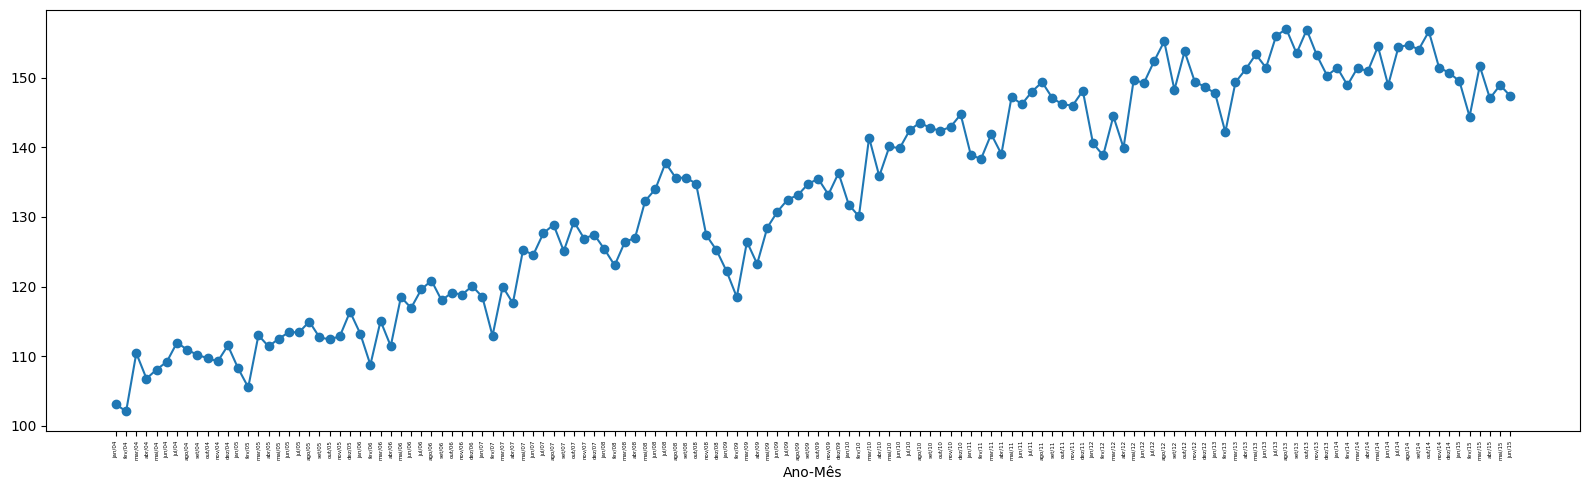

In [18]:
# Visualização da série
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.plot(pib['ANO_MES'], pib['PIB'], marker='o', linestyle='-')
plt.xlabel('Ano-Mês')
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=4)
plt.tight_layout()

plt.show()

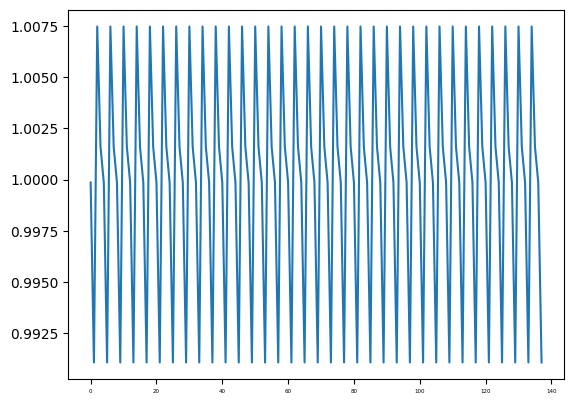

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(pib['PIB'],model= 'multiplicative', period=4)
plt.plot(result.seasonal)

In [28]:
pib

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi3,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70
3,4,abr/04,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,102.05,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,fev/15,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,...,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,148.92
134,135,mar/15,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,...,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44
135,136,abr/15,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,...,149.51,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92
136,137,mai/15,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,...,144.42,149.51,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49


In [30]:
# Lag = feature deslocada em relação a variável original
pib['PIBi1_'] = pib['PIB'].shift(1)

pib

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00,NaN
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,103.09
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,102.05
3,4,abr/04,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,110.43
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,106.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,fev/15,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,...,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,148.92,149.51
134,135,mar/15,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,...,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,144.42
135,136,abr/15,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,...,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.68
136,137,mai/15,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,...,149.51,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,147.03


In [32]:
# Estatísticas em janelas deslizantes
pib.rolling(12).sum()

<ipython-input-32-4c5f44a3c644>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ANO_MES'], dtype='object')
  pib.rolling(12).sum()


,Unnamed: 0,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,PRP,...,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1542.0,1821.64,1883.98,1902.47,1882.58,1930.81,2101.46,1962.03,2020.27,1678.92,...,1829.40,1829.63,1829.09,1831.32,1833.03,1835.53,1834.40,1834.68,1832.59,1826.14
134,1554.0,1821.88,1878.17,1904.42,1878.76,1926.83,2103.66,1958.93,2004.15,1684.98,...,1827.66,1829.40,1829.63,1829.09,1831.32,1833.03,1835.53,1834.40,1834.68,1821.64
135,1566.0,1817.99,1878.12,1894.43,1876.24,1926.29,2093.47,1955.74,1996.97,1677.81,...,1828.06,1827.66,1829.40,1829.63,1829.09,1831.32,1833.03,1835.53,1834.40,1821.88
136,1578.0,1812.44,1878.10,1881.94,1873.09,1928.34,2080.91,1953.94,1995.20,1669.62,...,1826.14,1828.06,1827.66,1829.40,1829.63,1829.09,1831.32,1833.03,1835.53,1817.99


In [36]:
# Valores nulos: preenchimento em séries temporais
import numpy as np
pib.at[3,'PIB']=np.nan
pib.head(6)


,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00,NaN
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,103.09
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,102.05
3,4,abr/04,NaN,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,110.43
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,106.77
5,6,jun/04,109.19,89.25,119.93,96.11,87.79,128.51,96.83,84.00,...,102.05,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,108.08


In [37]:
pib['PIBt'] = pib['PIB'].fillna(method='ffill')
pib.head(6)

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_,PIBt
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00,NaN,103.09
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,103.09,102.05
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,102.05,110.43
3,4,abr/04,NaN,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,110.43,110.43
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,106.77,108.08
5,6,jun/04,109.19,89.25,119.93,96.11,87.79,128.51,96.83,84.00,...,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,108.08,109.19


In [38]:
pib.at[3,'PIB']=np.nan
pib

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_,PIBt
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00,NaN,103.09
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,103.09,102.05
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,102.05,110.43
3,4,abr/04,NaN,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,110.43,110.43
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,106.77,108.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,fev/15,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,...,154.04,154.75,154.34,148.92,154.49,150.92,151.44,148.92,149.51,144.42
134,135,mar/15,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,...,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,144.42,151.68
135,136,abr/15,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,...,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.68,147.03
136,137,mai/15,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,...,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,147.03,148.94


In [41]:
# Interpolação
pib['PIBt2'] = pib['PIB'].interpolate()
pib.head(6)

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_,PIBt,PIBt2
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,102.24,99.96,101.93,101.17,101.70,100.03,100.00,NaN,103.09,103.090
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,102.59,102.24,99.96,101.93,101.17,101.70,100.03,103.09,102.05,102.050
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,104.52,102.59,102.24,99.96,101.93,101.17,101.70,102.05,110.43,110.430
3,4,abr/04,NaN,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,110.43,110.43,109.255
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,106.77,108.08,108.080
5,6,jun/04,109.19,89.25,119.93,96.11,87.79,128.51,96.83,84.00,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,108.08,109.19,109.190
